# House Price Prediction Project

## Objective
The goal of this project is to predict house prices using historical housing data.
This notebook focuses on data understanding and exploratory data analysis (EDA).

## Steps Covered
1. Project Setup
2. Data Loading
3. Data understanding
4. Exploratory Data Analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [33]:
df = pd.read_csv("../data/raw/train.csv")

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
df.shape

(1460, 81)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [37]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [39]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [40]:
df.select_dtypes(include=["number"]).shape

(1460, 38)

In [41]:
df.select_dtypes(include=["object"]).shape

(1460, 43)

In [42]:
features_with_missing_values = [features for features in df.columns if df[features].isnull().sum()>0]
features_with_missing_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [43]:
df[features_with_missing_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [44]:
df[features_with_missing_values].isnull().sum() / len(df) * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

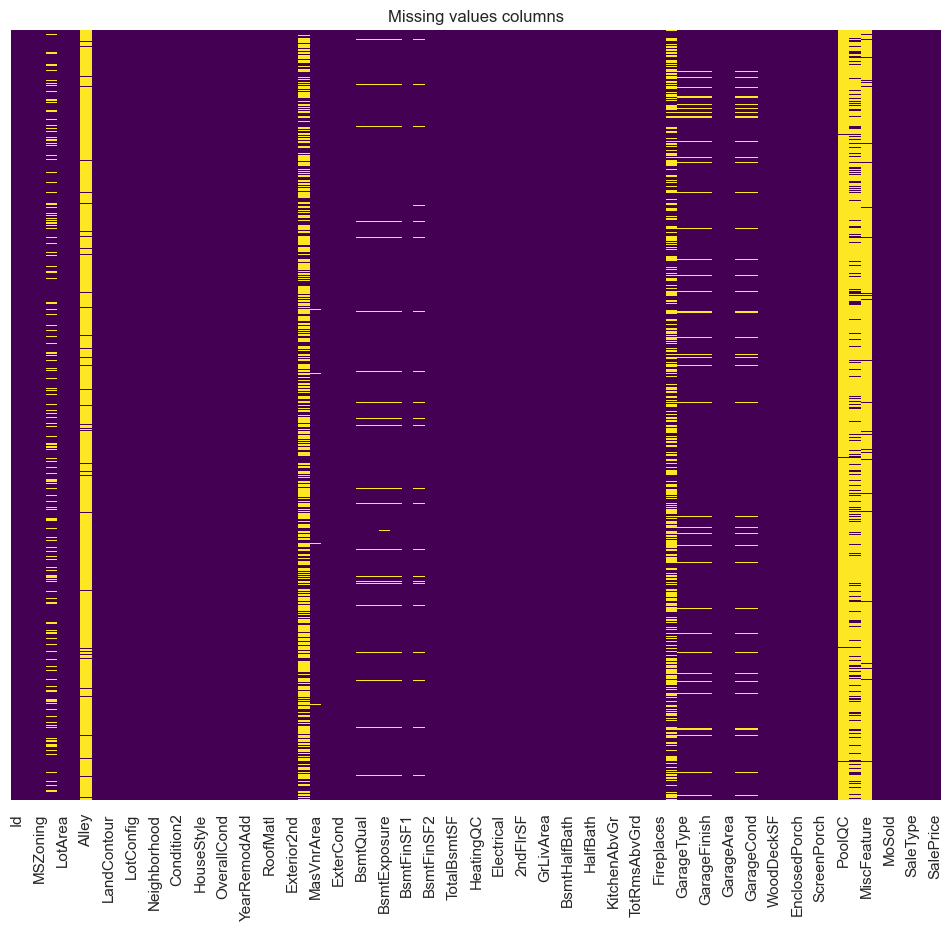

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), yticklabels=False ,cbar=False, cmap='viridis')

plt.title("Missing values columns")
plt.show()

In [46]:
df["YearBuilt"].value_counts().sort_index()

YearBuilt
1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: count, Length: 112, dtype: int64

In [47]:
df["BuildDecade"] = (df["YearBuilt"]// 10) * 10
decade_counts = df["BuildDecade"].value_counts().sort_index()

In [48]:
decade_counts

BuildDecade
1870      2
1880      7
1890      6
1900     15
1910     58
1920     97
1930     54
1940     79
1950    167
1960    175
1970    188
1980     61
1990    163
2000    387
2010      1
Name: count, dtype: int64

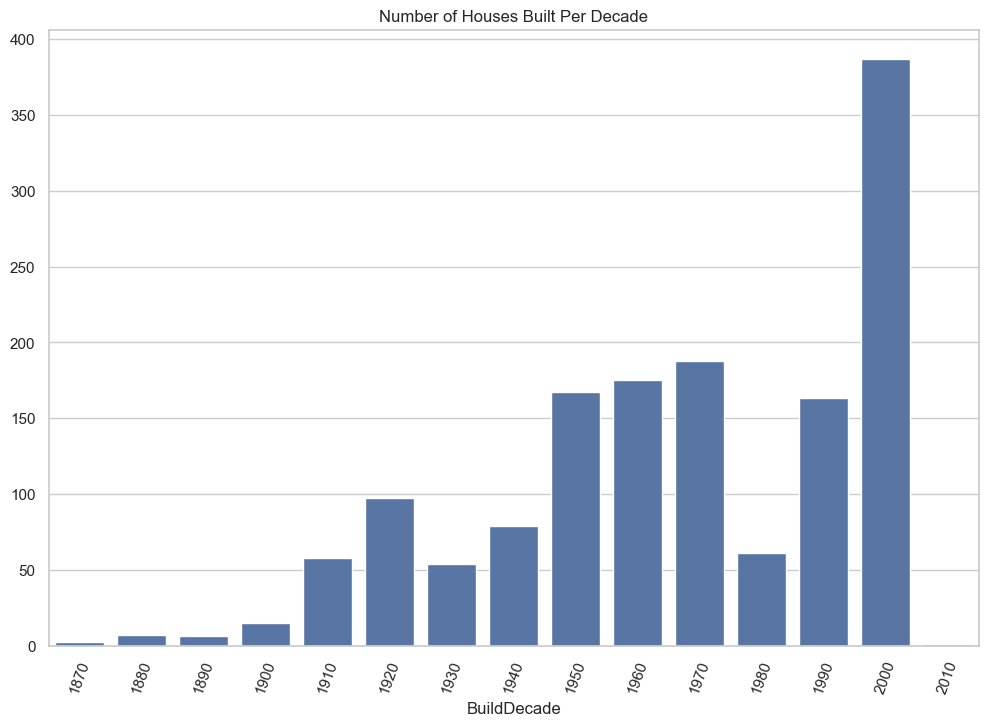

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x=decade_counts.index, y=decade_counts.values)
plt.title("Number of Houses Built Per Decade")
plt.xticks(rotation=70)
plt.show()

### 
EDA Observations
- Dataset has 1460 rows and 81 columns
- There are 38 numerical and 43 categorical features 
- SalePrice is the target variable
- There are both numerical and categorical features
- Some columns have missing values


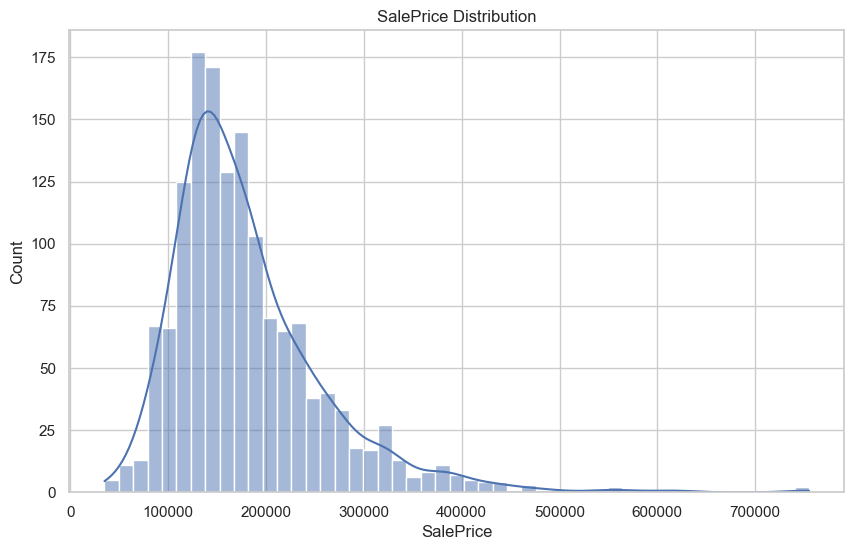

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(df["SalePrice"], kde=True)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.show()

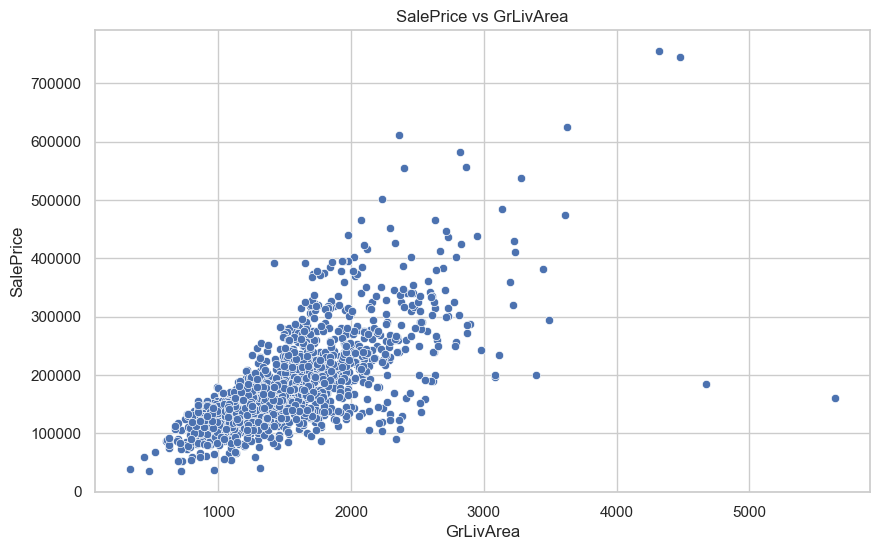

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["GrLivArea"],y=df["SalePrice"])
plt.title("SalePrice vs GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

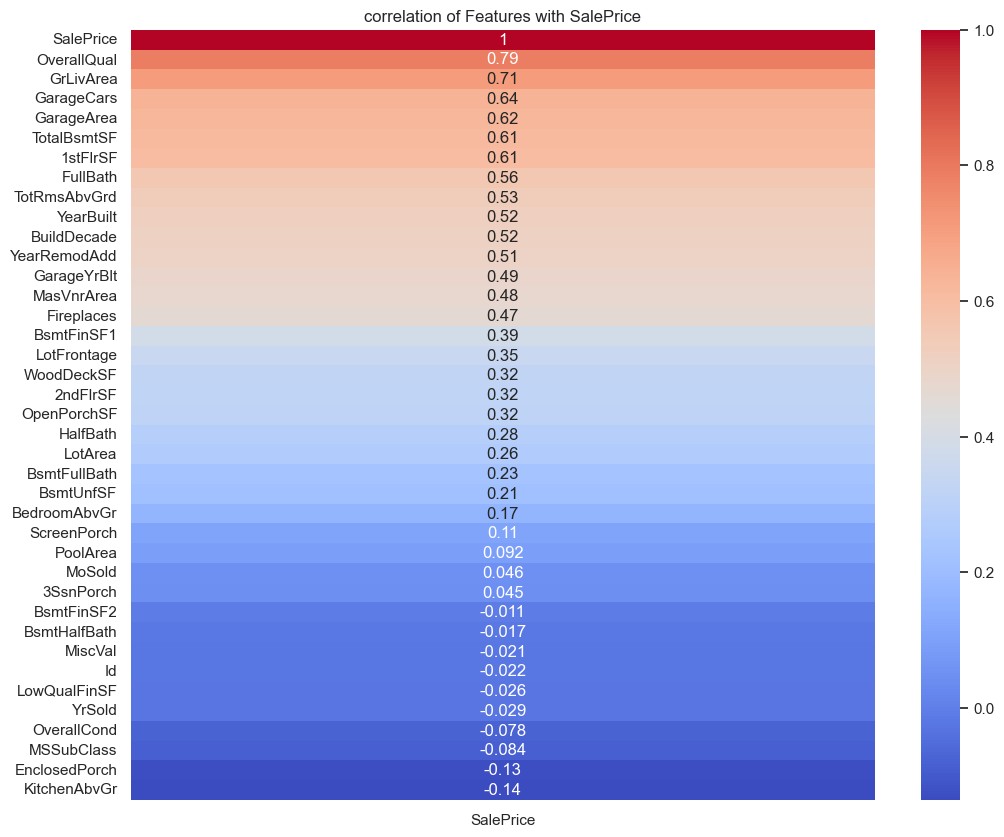

In [52]:
plt.figure(figsize=(12,10))
df_num = df.select_dtypes(include="number")
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix['SalePrice'].sort_values(ascending=False).to_frame(), annot=True, cmap="coolwarm")
plt.title("correlation of Features with SalePrice")
plt.show()

### EDA Observations
- SalePrice shows strong positive correlation with OverallQual and GrLivArea, indicating that higher quality and larger living area generally lead to higher prices.
- The distribution of SalePrice is right-skewed, suggesting that most houses are moderately priced with a few very expensive properties.
- A small number of outliers exist where houses have unusually large living areas but relatively low sale prices, which may negatively impact linear models.


In [53]:
df_clean = df[df["GrLivArea"] < 4000]

In [54]:
df_clean.shape

(1456, 82)

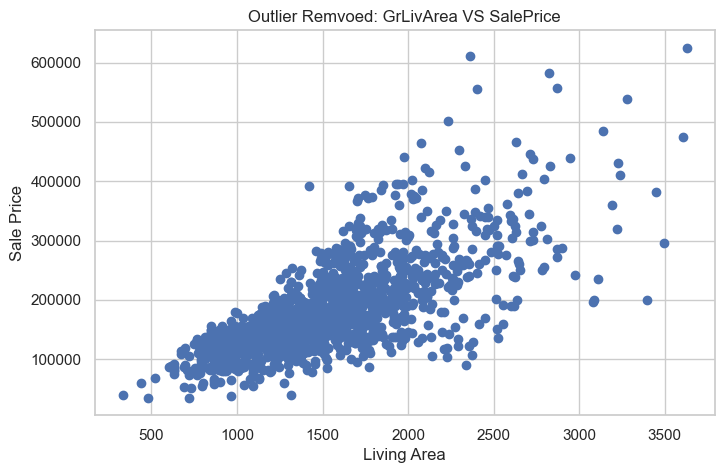

In [55]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean["GrLivArea"],df_clean["SalePrice"])
plt.title("Outlier Remvoed: GrLivArea VS SalePrice")
plt.xlabel("Living Area")
plt.ylabel("Sale Price")
plt.show()

### Outlier Handling:
- Extreme outliers were observed in GrLivArea vs SalePrice
- Properties with GrLivArea > 4000 were removed to reduce the distortion in linear regression

In [58]:
## Exporting data into folder
df_clean.to_csv("../data/processed/eda_dataset.csv", index=False)